# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

*K-Means Clustering* adalah salah satu metode unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok (*cluster*) berdasarkan kemiripan karakteristik. Setiap kelompok direpresentasikan oleh sebuah titik pusat yang disebut *centroid*. Tujuan dari metode ini adalah meminimalkan jarak antara titik-titik data dalam satu cluster terhadap centroid-nya, sehingga data yang mirip dikelompokkan bersama dan data yang berbeda ditempatkan di cluster yang berbeda.

Prosesnya dimulai dengan menentukan jumlah cluster (*k*), kemudian algoritma akan menyesuaikan posisi centroid dan pembagian data secara iteratif hingga konvergen.

---

## **Manfaat *Clustering***

Metode *clustering* sangat berguna dalam berbagai bidang karena mampu mengungkap struktur alami dalam data tanpa label. Beberapa manfaat utama dari *clustering* antara lain:

* **Segmentasi Pasar**: Mengelompokkan pelanggan berdasarkan perilaku pembelian, preferensi, atau demografi untuk strategi pemasaran yang lebih efektif.
* **Pemetaan Wilayah**: Menentukan zonasi wilayah dalam perencanaan kota atau distribusi layanan.
* **Komputer Vision dan Image Processing**: Mengelompokkan piksel atau fitur dalam gambar untuk tujuan klasifikasi atau deteksi objek.

Hasil clustering yang baik akan menunjukkan:

* Tingkat **kemiripan tinggi dalam satu cluster** (intra-cluster similarity).
* Tingkat **perbedaan tinggi antar cluster** (inter-cluster dissimilarity).

Kualitas hasil clustering sangat bergantung pada pemilihan metode yang tepat serta evaluasi hasil pengelompokan secara objektif.

---

## **Inertia (*Sum of Squared Errors / SSE*)**

Salah satu metrik evaluasi pada K-Means adalah *inertia* atau Sum of Squared Errors (SSE), yang mengukur total jarak kuadrat antara setiap titik data dan centroid cluster-nya. Semakin kecil nilai inertia, semakin baik hasil clustering karena menunjukkan data semakin dekat dengan pusat klasternya.

### Rumus:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

### Keterangan:

* \$x\_i\$ : Titik data ke-\$i\$
* \$\mu\_{c\_i}\$ : Centroid dari cluster tempat \$x\_i\$ berada
* \$\left| x\_i - \mu\_{c\_i} \right|^2\$ : Jarak Euclidean kuadrat antara titik dan centroid
* \$n\$ : Jumlah total data

> **Catatan**: Inertia tidak memperhitungkan jarak antar cluster, sehingga bisa menyesatkan jika digunakan sendiri tanpa metrik lain.

---

## **Silhouette Analysis**

Silhouette Analysis adalah metode evaluasi yang lebih komprehensif dibandingkan inertia karena mempertimbangkan dua aspek sekaligus, yaitu:

1. **Kompaknya cluster** (cohesion)
2. **Jarak antar cluster** (separation)

Silhouette score mengukur seberapa baik suatu titik data cocok dengan cluster-nya dibandingkan dengan cluster lain yang paling dekat.

### Rumus:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

### Keterangan:

* \$a(i)\$ : Rata-rata jarak antara titik \$i\$ dengan semua titik dalam cluster yang sama
* \$b(i)\$ : Rata-rata jarak antara titik \$i\$ dengan semua titik dalam cluster terdekat lainnya
* \$s(i)\$ : Skor silhouette untuk titik \$i\$ (bernilai antara -1 hingga 1)

### Interpretasi Nilai:

* \$s(i) \approx 1\$ : Titik sangat sesuai dengan cluster-nya dan jauh dari cluster lain
* \$s(i) \approx 0\$ : Titik berada di batas antara dua cluster
* \$s(i) \approx -1\$ : Titik kemungkinan salah masuk cluster

### Silhouette Score Rata-rata:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

* \$n\$ : Jumlah total data
* \$S\$ : Nilai rata-rata silhouette score seluruh data (digunakan untuk mengevaluasi kualitas clustering secara keseluruhan)


## Implementasi dengan menggunakan data Iris

In [24]:
%pip install pymysql
%pip install psycopg2

## Library yang digunakan

In [25]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [26]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-24ccfcfa-iqbal.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7h7RaEuETy6xtaTdGPL",
        database="defaultdb",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-207e66db-iqbal.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_moPYLh4RrOq11aEBY_x",
        database="iris",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_dataset")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          64.0         72.0          85.1         93.5
  2     Iris-setosa          14.0          2.0         904.9        309.1
  3     Iris-setosa          10.3         50.2         584.7        803.2
  4     Iris-setosa          31.5          4.2         304.6        163.1
  5     Iris-setosa          49.4          3.2         605.0        703.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.0          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.4           4.9          3.1
 11     Iris-setosa           1.5          0.3           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.3     

### visualisasi 2D data Iris menggunakan scatter plot berdasarkan dua fitur: sepal_length dan sepal_width.

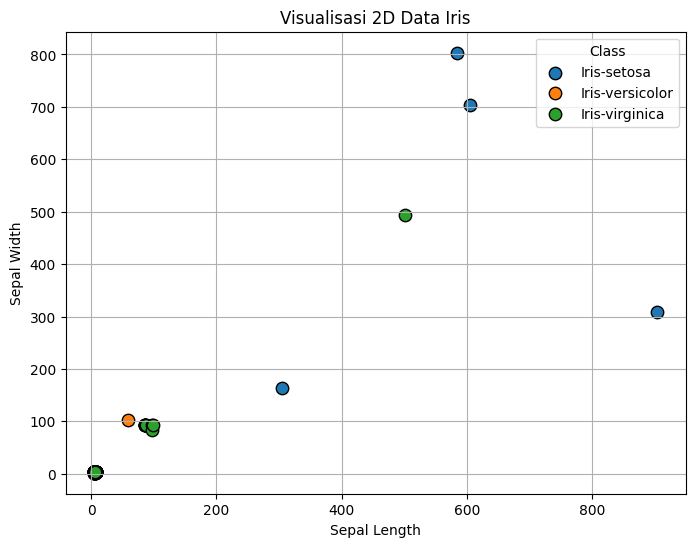

In [27]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


##visualisasi data Iris dalam bentuk scatter plot 3D berdasarkan tiga fitur yaitu sepal_length, sepal_width, dan petal_length, di mana setiap titik diberi warna dan label sesuai dengan kategori kelas bunga (class).

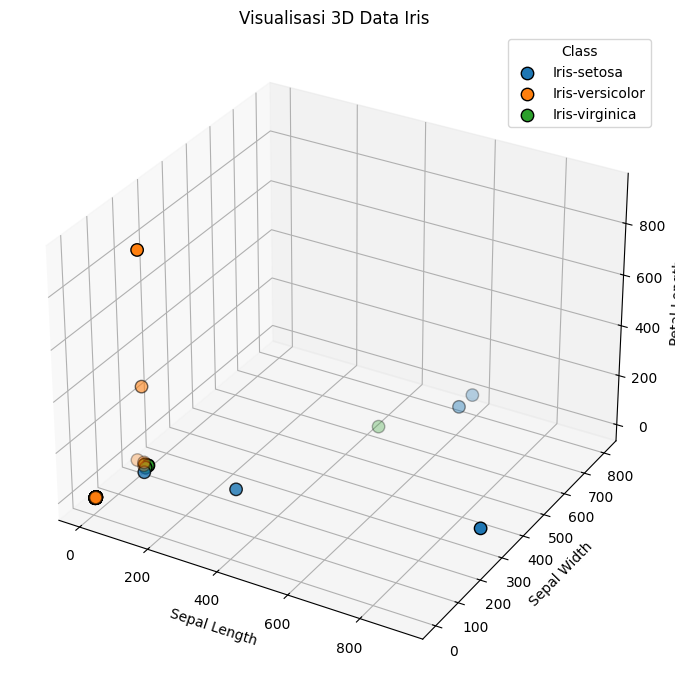

In [28]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### untuk melakukan reduksi dimensi pada data Iris menggunakan PCA (Principal Component Analysis) tanpa melakukan normalisasi terlebih dahulu, dan kemudian divisualisasikan dalam bentuk scatter plot 2D.

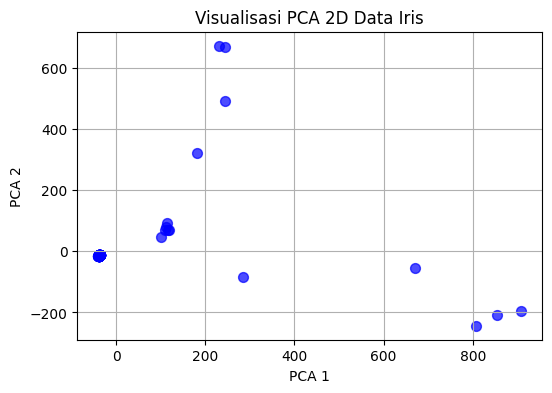

In [29]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

##untuk melakukan reduksi dimensi ke dalam 3 komponen utama pada data Iris menggunakan metode PCA (Principal Component Analysis) tanpa normalisasi, kemudian divisualisasikan dalam bentuk scatter plot 3D.

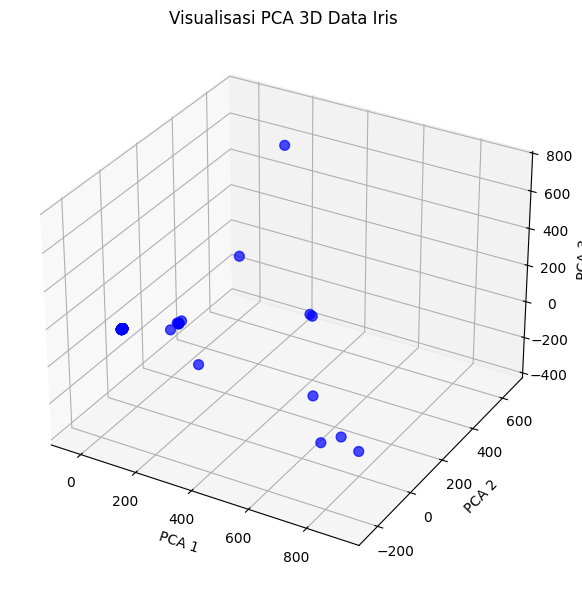

In [30]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### untuk melakukan normalisasi pada fitur numerik dalam data Iris, kemudian dilanjutkan dengan reduksi dimensi menggunakan PCA (Principal Component Analysis) ke dalam 3 komponen utama.

In [31]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [32]:
print (scaled_features);

[[6.82335102e-02 8.97403894e-02 9.00210900e-02 1.14203694e-01]
 [1.40799307e-02 2.37144284e-03 1.00000000e+00 3.83300050e-01]
 [1.00725658e-02 6.25312032e-02 6.44577645e-01 1.00000000e+00]
 [3.30336835e-02 5.11732401e-03 3.33666334e-01 2.01073390e-01]
 [5.24206650e-02 3.86919621e-03 6.67110667e-01 8.75686470e-01]
 [7.58150114e-04 3.74438342e-04 1.55400155e-03 2.37144284e-03]
 [4.33228636e-04 2.49625562e-04 0.00000000e+00 1.74737893e-03]
 [5.41535796e-04 1.24812781e-04 1.11000111e-03 1.74737893e-03]
 [4.33228636e-04 1.24812781e-04 4.44000444e-04 1.12331503e-03]
 [5.41535796e-04 3.74438342e-04 9.99000999e-04 1.37294059e-03]
 [5.41535796e-04 2.49625562e-04 1.55400155e-03 2.12181727e-03]
 [6.49842955e-04 1.24812781e-04 8.88000888e-04 1.74737893e-03]
 [3.24921477e-04 3.74438342e-04 8.88000888e-04 1.24812781e-03]
 [0.00000000e+00 1.24812781e-04 3.33000333e-04 1.24812781e-03]
 [2.16614318e-04 1.24812781e-04 1.99800200e-03 2.49625562e-03]
 [5.41535796e-04 3.74438342e-04 1.88700189e-03 2.496255

## Clustering menggunakan K-Means

##untuk melakukan clustering dengan algoritma K-Means menggunakan 2 cluster pada data Iris yang telah dinormalisasi, serta mengevaluasi dan memvisualisasikan hasilnya.

[2 Clusters] Inertia: 3.9937, Silhouette Score: 0.9236


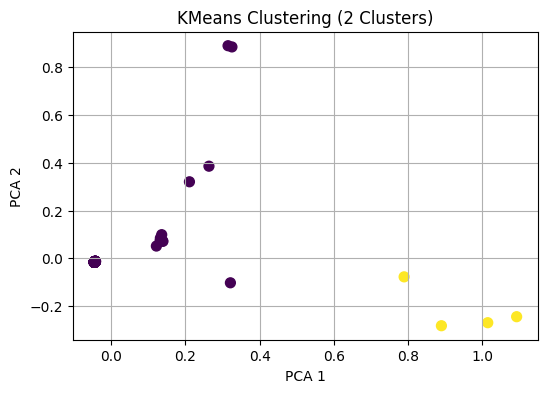

In [33]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


 ## menjalankan proses K-Means clustering dengan 2 cluster pada data Iris yang telah dinormalisasi, lalu hasilnya divisualisasikan dalam plot 3D menggunakan PCA.

[2 Clusters] Inertia: 3.9937, Silhouette Score: 0.9236


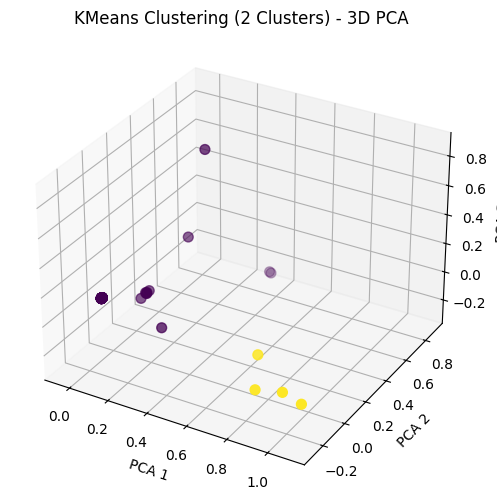

In [34]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### melakukan clustering menggunakan algoritma K-Means dengan 3 cluster pada data Iris yang telah dinormalisasi, lalu menampilkan evaluasi serta visualisasi hasilnya dalam bentuk 2D plot.

[3 Clusters] Inertia: 1.9648, Silhouette Score: 0.9350


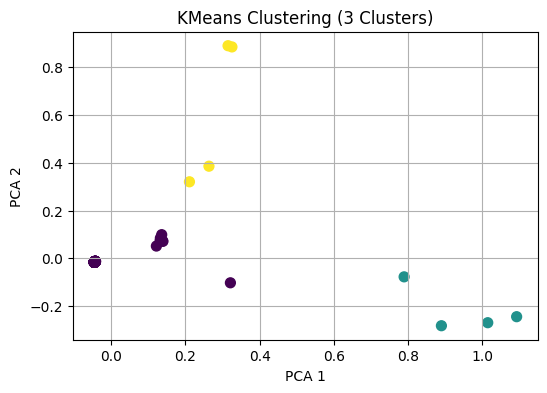

In [35]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## melakukan clustering pada data Iris yang sudah dinormalisasi menggunakan algoritma K-Means dengan 3 cluster, kemudian mengevaluasi dan memvisualisasikan hasil clustering dalam ruang 3 dimensi hasil reduksi PCA.

[3 Clusters] Inertia: 1.9648, Silhouette Score: 0.9350


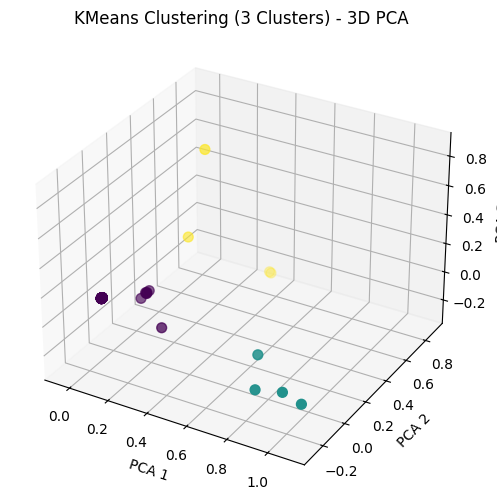

In [36]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### melakukan clustering menggunakan K-Means dengan 4 cluster pada data yang sudah dinormalisasi, kemudian menampilkan evaluasi dan visualisasi hasilnya dalam bentuk plot 2D. Pertama, model KMeans dibuat dengan n_clusters=4 dan diterapkan pada data fitur yang telah diskalakan (scaled_features).

[4 Clusters] Inertia: 0.9149, Silhouette Score: 0.9437


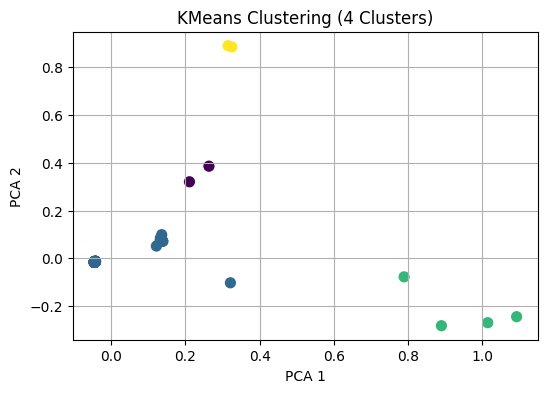

In [37]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

##melakukan clustering K-Means dengan 4 cluster pada data Iris yang sudah dinormalisasi, lalu mengevaluasi dan memvisualisasikan hasil clustering dalam ruang 3 dimensi hasil reduksi PCA.

[4 Clusters] Inertia: 0.9149, Silhouette Score: 0.9437


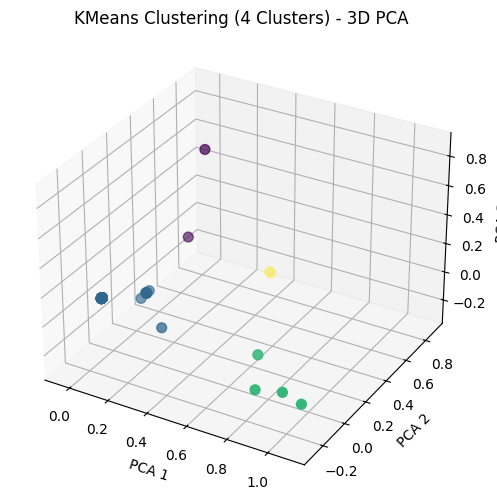

In [38]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
